# Homework 2: U.S. Boundary Currents

Name: Rome Drori

Date: 2/7/2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [10]:
# import modules here
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `NVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [54]:
# read in the EVEL and NVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook

# Loading the eastward velocity data
ds_evel = xr.open_dataset("EVEL_2015_12.nc")
display(ds_evel)

# Loading the meridional velocity data
ds_nvel = xr.open_dataset("NVEL_2015_12.nc")
ds_nvel

<xarray.Dataset>
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    Z          (k) float32 ...
    timestep   (time) int64 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    EVEL       (time, k, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Tue Aug 27 17:25:43 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

<xarray.Dataset>
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    Z          (k) float32 ...
    timestep   (time) int64 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    NVEL       (time, k, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Tue Aug 27 17:34:26 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [55]:
# store the velocity components and longitude/latitude data
# into numpy arrays

# Store the velocity components into numpy arrays
evel = np.array(ds_evel['EVEL'])
nvel = np.array(ds_nvel['NVEL'])

#  Store the latitude and longitude data into numpy arrays
lon = np.array(ds_evel['longitude'])
lat = np.array(ds_evel['latitude'])

#print to make sure data extracted to something at all
print("EVEL: ", evel.shape)
print("NVEL: ", nvel.shape)
print("longitude: ", lon.shape)
print("latitude: ", lat.shape)


EVEL:  (1, 50, 360, 720)
NVEL:  (1, 50, 360, 720)
longitude:  (720,)
latitude:  (360,)


Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

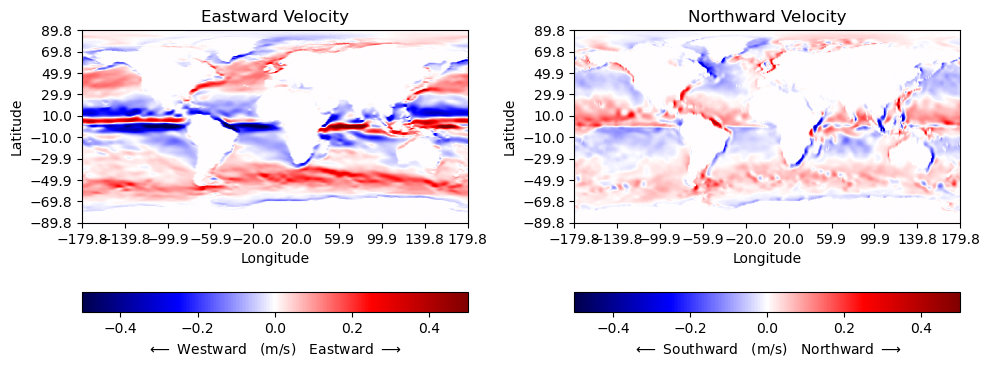

In [71]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

evel_trim = evel[0, 0, :, :]
nvel_trim = nvel[0, 0, :, :]

lon_ticks = np.linspace(lon.min(), lon.max(), num=10)  
lat_ticks = np.linspace(lat.min(), lat.max(), num=10)

# Create a figure with two side-by-side subplots
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface

plt.subplot(1,2,1)
im1 = plt.imshow(evel_trim,
                 extent=[lon.min(), lon.max(), lat.min(), lat.max()],
                 origin='lower',
                 cmap='seismic',
                 vmin=-0.5, vmax=0.5)
plt.title("Eastward Velocity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xticks(lon_ticks)
plt.yticks(lat_ticks)
plt.colorbar(im1, orientation='horizontal',label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)

im2 = plt.imshow(nvel_trim,
                 extent=[lon.min(), lon.max(), lat.min(), lat.max()],
                 origin='lower',
                 cmap='seismic',
                 vmin=-0.5, vmax=0.5)
plt.title("Northward Velocity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xticks(lon_ticks)
plt.yticks(lat_ticks)
plt.colorbar(im2, orientation='horizontal', label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$')
plt.tight_layout()
plt.show()



### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1.
    - The currents on the east coast at roughly 30 degrees north move northwest, and on the west coast there is a bunch of white there on the eastward velocity plot but they seem to be moving southeast. The currents on the east coast at roughly ?
    - The currents on the east coast at roughly 45 degrees north seem to move southeast, and the currents on the west coast seem to move southwest.

2. The currents on the east coast move faster.
2. The north atlantic gyre is a clockiwse rotating system of ocean currents in the north atlantic, the currents at both 30 and 45 degrees north move in a way that makes sense for them to be part of the gyre, northwest and southwest would indicate that the current at 30 degrees north is more towards the bottom or middle of the gyre while the one at 45 degrees north is more towards the top. 
    The north pacific gyre also moves clockwise, and the currents once again coincide with this with the top current moving southeast and the bottom current moving northwest once again forming in as part of the gyres. 
    hese currents are caused due to differences in salinitym temparature(density) and wind along the oceans causing them both to move in a clockiwse direction.
    

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [62]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset("THETA_2015_12.nc")
ds_theta


<xarray.Dataset>
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    Z          (k) float32 ...
    timestep   (time) int64 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Aug 22 19:28:22 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [66]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])
lon = np.array(ds_theta['longitude'])
lat = np.array(ds_theta['latitude'])

print("THETA:", theta.shape)
print("Longitude:", lon.shape)
print("Latitude:", lat.shape)


THETA: (1, 50, 360, 720)
Longitude: (720,)
Latitude: (360,)


Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

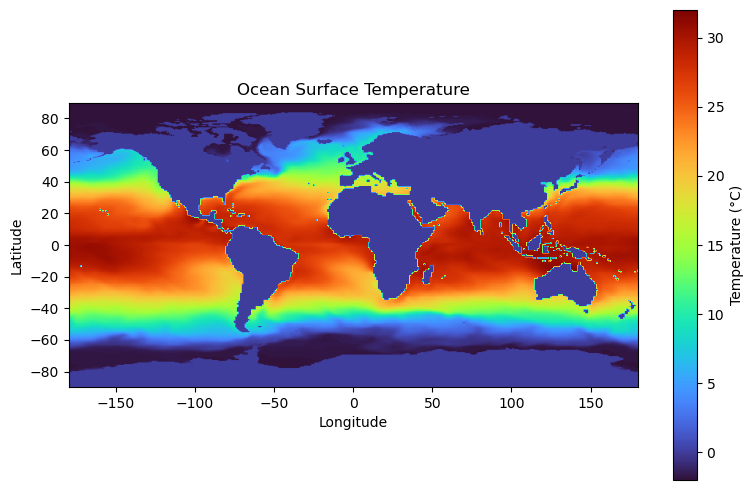

In [67]:
# make a plot of the temperature
theta_surface = theta[0, 0, :, :]  

# make a figure
fig = plt.figure(figsize=(8,5))


# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

im = plt.imshow(
    theta_surface,
    extent=[lon.min(), lon.max(), lat.min(), lat.max()],
    origin='lower',
    cmap='turbo',   
    vmin=-2,
    vmax=32
)



# plot the data
plt.title("Ocean Surface Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar(im)
cbar.set_label("Temperature (°C)")
plt.tight_layout()
plt.show()


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1.  The west coast is typically cooler than the east coast at the same lattitude.
2.  Currents in the west coast typically flow southward along the coast bringing cold water down and leading to cooler temparatures, while currents in the east coast typically flow northward along the coast bringing warm water up from teh equator typically leading to warmer temparatures.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [30]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook

ds_wvel = xr.open_dataset("WVELSTAR_2015_12.nc")
print("WVELSTAR dataset info:")
print(ds_wvel)


WVELSTAR dataset info:
<xarray.Dataset>
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    timestep   (time) int64 ...
    Zl         (k_l) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  

In [40]:
# store the WVELSTAR grid into a into numpy array
wvelstar = ds_wvel["WVELSTAR"]

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [41]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
Zl = np.array(ds_wvel['Zl'])



Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

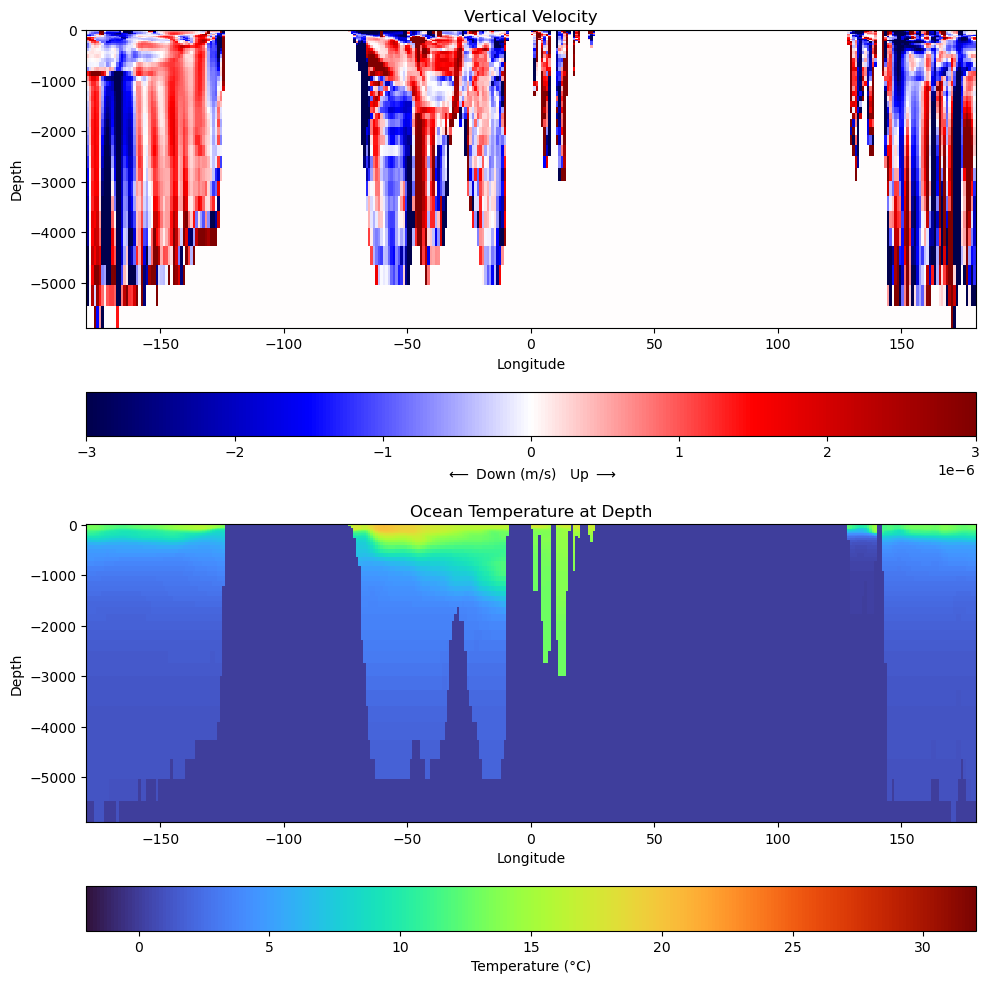

In [77]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
mesh = plt.pcolormesh(
    lon,                 
    Zl,                   
    wvelstar[0, :, 259, :],   
    vmin=-3e-6, vmax=3e-6,   
    cmap='seismic'
)
plt.colorbar(mesh, orientation='horizontal',
             label='$\\longleftarrow$ Down (m/s)   Up $\\longrightarrow$')
plt.title("Vertical Velocity")
plt.xlabel("Longitude")
plt.ylabel("Depth")



# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
mesh = plt.pcolormesh(
    lon,
    Zl,
    theta[0, :, 259, :],
    vmin=-2, vmax=32,      
    cmap='turbo'           
)
plt.colorbar(mesh, orientation='horizontal', label='Temperature (°C)')
plt.title("Ocean Temperature at Depth")
plt.xlabel("Longitude")
plt.ylabel("Depth")
plt.tight_layout()
plt.show()


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1.  The velocity of the currents on the west coast are almost entirely upward with some downward velocity further away from the coastline more central towards the pacific ocean. The currents on the otherhand are almost entirely downward right next to the coast with some upward velocity mixed in moving further away. The velocities on the east coast are also much much slower than those on the west coast.
2.  The vertical velocity is affected by things such as geography temparature while not at all being affected by winds while the horizontal velocity is affected by winds (or the coriolis effect?) in addition to the prior factors.
3.  From what I can find on google the stronger presence of upward moving vertical currents along the west coast leads to a phenomena called upwelling which brings cooler water to the the surface along the west coast leading to cooler surface temparture of the water and thus cooler climates. While on the east coast the larger presence of downward moving currents leads to a phenomena called downwelling wherin the colder water is replaced by warmer water leading to warmer surface tempartures and thus a warmer climate.
4.   Since winds flow south they might bring in more water from the north and also push some of the water westward and away from the shore strengthening upwelling, and thus leading to increacide vertical velocity moving upward, I am not sure about this answer though.